In [33]:
from __future__ import absolute_import, division, print_function, unicode_literals



from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pathlib
import numpy as np

In [34]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [35]:
data_dir = 'C:\\Users\\XPS\\Documents\\course\\project\\Dataset\\outdoors'
data_dir= pathlib.Path(data_dir)


In [36]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

50000

In [37]:
BATCH_SIZE = 40
IMG_HEIGHT = 32
IMG_WIDTH = 32
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [38]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [39]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['airfield', 'alley', 'athletic_field-outdoor', 'beach',
       'crosswalk', 'desert-sand', 'forest_path', 'iceberg', 'lawn',
       'river'], dtype='<U22')

In [47]:
CLASS_NAMES.shape

(10,)

In [55]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode= 'binary')

Found 50000 images belonging to 10 classes.


In [48]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(label_batch[n])
      plt.axis('off')

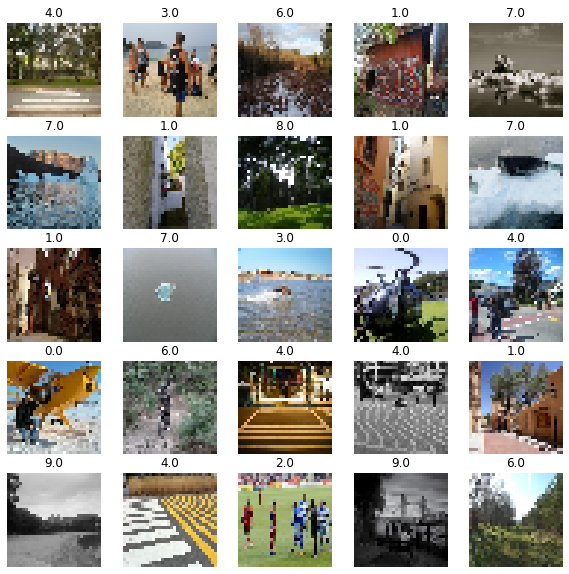

In [56]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [58]:
label_batch.shape


(40,)

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [42]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [51]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
model.fit_generator(
        train_data_gen,
        steps_per_epoch=1,
        epochs=1)

1/1 [==============================] - 8s 8s/step - loss: 2.3041 - accuracy: 0.1250
